Text(0.5, 1.0, 'Figure 5.10')

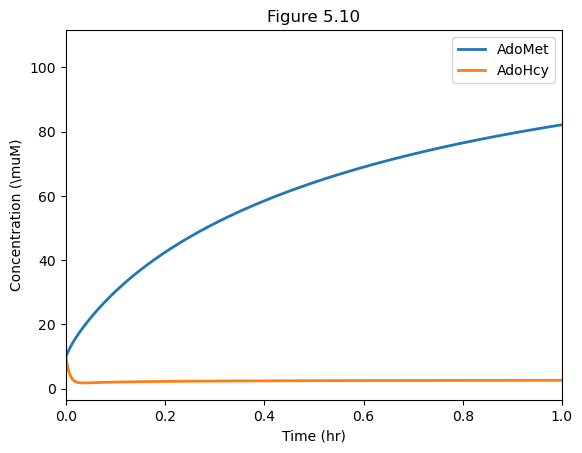

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 14 22:52:20 2022

%file methionine_model.m
%from Martinov et al. (2000) Journal of Theoretical Biology vol. 204 pp. 521-532
%generates figures 5.10, 5.11, 5.12
%problem 5.6.6

@author: bingalls
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint




#parameter assignment
#METI
v_MATI_max = 561
K_MATI_m = 41
K_MATI_i = 50

#MATIII
v_MATIII_max = 22870 #22.87 mmol/hr/l;
K_MATIII_m2 = 21.1

#MET
v_MET_max = 4544
A_over_K_MET_m2 = 0.1

#GNMT
v_GNMT_max = 10600 #10.6 mmol/hr/l;
K_GNMT_m = 4500
K_GNMT_i = 20

#D
alpha_d = 1333

#AHC
K_AHC = 0.1
Adenosine = 1

#Methionine concentration
Met=48.5


#declare right-hand-side for model
def methdt(S,t):
    dS=[0,0] #generate a list to store derivatives
 

#define states locally
    AdoMet=S[0]
    AdoHcy=S[1]

#auxilliary variables
    K_MATIII_m1 = 20000/(1+ 5.7*(np.power(AdoMet/(AdoMet+600),2)))
    K_MET_m1 = 10 * (1 + AdoHcy/4)
    Hcy = AdoHcy*K_AHC/Adenosine


    v_MATI= v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+AdoMet/K_MATI_i))) 
    v_MATIII = v_MATIII_max * (1/(1+ (K_MATIII_m1*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))
    v_GNMT = v_GNMT_max * (1/(1+np.power(K_GNMT_m/AdoMet,2.3))) * (1/(1+AdoHcy/K_GNMT_i))
    v_MET = v_MET_max * (1/(1+ K_MET_m1/AdoMet + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*(K_MET_m1/AdoMet)))
    V_D = alpha_d * Hcy;

    dAdoMetdt = (v_MATI + v_MATIII) - (v_GNMT+v_MET);
    dAdoHcydt = ((v_GNMT+v_MET) - V_D)/(1+K_AHC/Adenosine);

    dS[0]=dAdoMetdt
    dS[1]=dAdoHcydt

    return dS

#set simulation length
Tend=10;

#initial concentrations
S0=[10,10];

times=np.linspace(0,Tend,10000)

#simulation
S=odeint(methdt, S0, times) 

#plot figure  5.10
plt.figure() #generate figure
plt.plot(times, S[:,0], label="AdoMet", linewidth=2)
plt.plot(times, S[:,1], label="AdoHcy", linewidth=2)
plt.xlabel("Time (hr)")
plt.ylabel("Concentration (\muM)")
plt.legend()
plt.xlim(0, 1)
plt.title('Figure 5.10')

In [14]:
Adomet_ss = S[-1,0]
Adohcy_ss = S[-1,1]
Adomet_ss, Adohcy_ss

(106.40464039475441, 2.6907191630786036)

In [15]:
# Define flux equations for each enzyme at steady state
def calculate_fluxes(Adomet_ss, Adohcy_ss):

#auxilliary variables
    K_MATIII_m1 = 20000/(1+ 5.7*(np.power(Adomet_ss/(Adomet_ss+600),2)))
    K_MET_m1 = 10 * (1 + Adohcy_ss/4)
    Hcy = Adohcy_ss*K_AHC/Adenosine


    v_MATI= v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+Adomet_ss/K_MATI_i))) 
    v_MATIII = v_MATIII_max * (1/(1+ (K_MATIII_m1*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))
    v_GNMT = v_GNMT_max * (1/(1+np.power(K_GNMT_m/Adomet_ss,2.3))) * (1/(1+Adohcy_ss/K_GNMT_i))
    v_MET = v_MET_max * (1/(1+ K_MET_m1/Adomet_ss + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*(K_MET_m1/Adomet_ss)))
    V_D = alpha_d * Hcy;


    return v_MATI, v_MATIII, v_GNMT, v_MET, V_D

In [16]:
fluxes = calculate_fluxes(Adomet_ss, Adohcy_ss)
fluxes

(153.93619307569904,
 204.7475740550287,
 1.698357733997185,
 356.9745488085106,
 358.67286443837787)